In [1]:
import argparse
import logging
import sys
import torch
import torchvision
import torch.nn.functional as F
from torchvision import transforms
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
import cv2
from tqdm.notebook import tqdm
from PIL import Image 
import random
# import imageio as io

import numpy as np
import matplotlib.pyplot as plt
import time

from model import *
from data_ import *
from utils import *
# from unet_parts import *

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

# %load_ext autoreload
# %autoreload

seed_val=44
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

[2024-04-25 14:30:26,977]:  Checkpoint path: ./04-25_14:30
[2024-04-25 14:30:29,718]:  Batch size:None, filters:64


500 500


[2024-04-25 14:30:31,131]:  Built a model consisting of 1,786,191 parameters


learning rate reduced by factor of 2


[2024-04-25 14:30:40,040]:  epoch 00 | train_loss 1209135929.264 | train_psnr inf | train_ssim 0.996 | lr 5.0e-04                                                       
  3%|▎         | 17/500 [00:00<00:06, 79.58it/s]

tensor(5268.5728, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


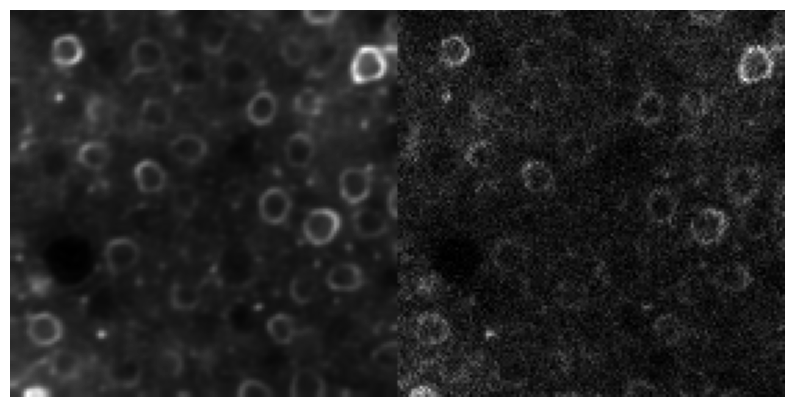

[2024-04-25 14:30:43,484]:  EVAL_count0:epoch 00 | valid_loss 1364727680.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:30:49,984]:  epoch 01 | train_loss 1217470715.871 | train_psnr inf | train_ssim 0.995 | lr 5.0e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 93.83it/s]

tensor(5410.2837, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


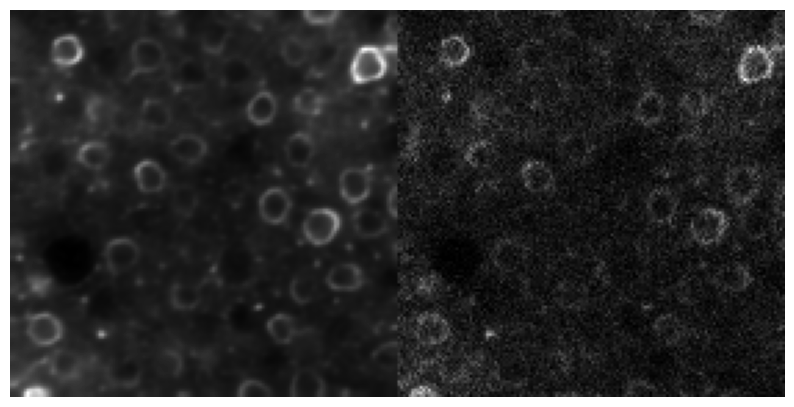

[2024-04-25 14:30:53,366]:  EVAL_count0:epoch 01 | valid_loss 932397568.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:31:00,126]:  epoch 02 | train_loss 1182492215.374 | train_psnr inf | train_ssim 0.995 | lr 5.0e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 85.75it/s]

tensor(5188.1431, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


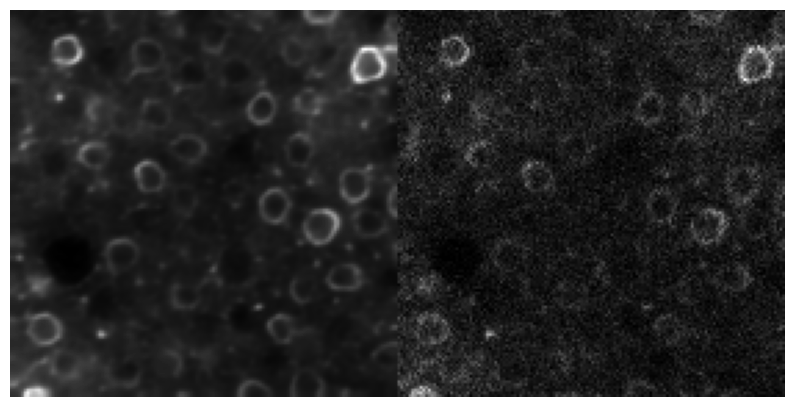

[2024-04-25 14:31:03,503]:  EVAL_count1:epoch 02 | valid_loss 1338824320.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:31:10,050]:  epoch 03 | train_loss 1157311036.000 | train_psnr inf | train_ssim 0.995 | lr 5.0e-04                                                     
  3%|▎         | 15/500 [00:00<00:05, 83.36it/s]

tensor(5303.8896, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


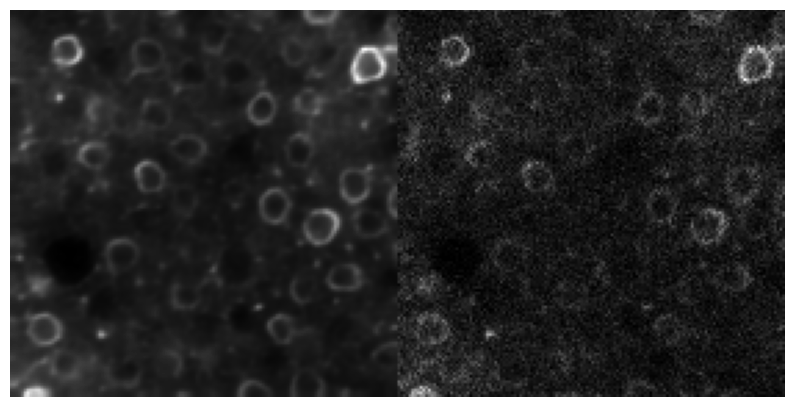

[2024-04-25 14:31:13,396]:  EVAL_count2:epoch 03 | valid_loss 1341219072.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:31:20,244]:  epoch 04 | train_loss 1234511652.993 | train_psnr inf | train_ssim 0.996 | lr 5.0e-04                                                      
  3%|▎         | 17/500 [00:00<00:06, 75.02it/s]

tensor(5827.3257, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


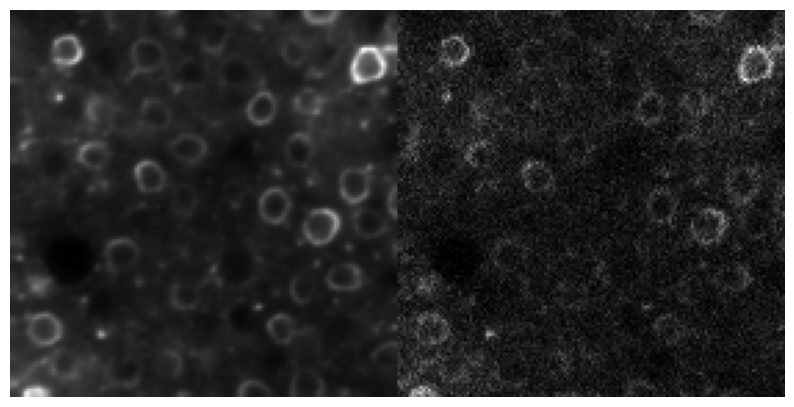

[2024-04-25 14:31:23,679]:  EVAL_count0:epoch 04 | valid_loss 930150272.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:31:30,280]:  epoch 05 | train_loss 1175188185.026 | train_psnr inf | train_ssim 0.995 | lr 5.0e-04                                                       
  3%|▎         | 17/500 [00:00<00:05, 93.13it/s]

tensor(5131.4873, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


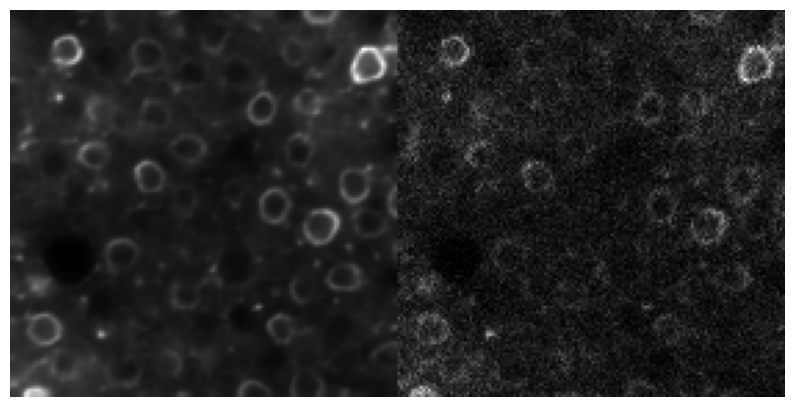

[2024-04-25 14:31:33,644]:  EVAL_count1:epoch 05 | valid_loss 1199484928.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:31:40,117]:  epoch 06 | train_loss 1314328696.738 | train_psnr inf | train_ssim 0.996 | lr 5.0e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 91.99it/s]

tensor(5206.3296, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


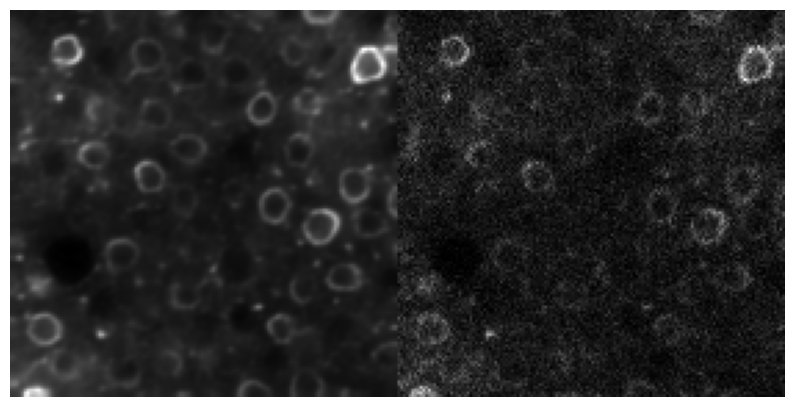

[2024-04-25 14:31:43,475]:  EVAL_count2:epoch 06 | valid_loss 1368754432.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:31:50,311]:  epoch 07 | train_loss 1157670213.309 | train_psnr inf | train_ssim 0.995 | lr 5.0e-04                                                       
  3%|▎         | 16/500 [00:00<00:05, 87.12it/s]

tensor(5160.8589, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


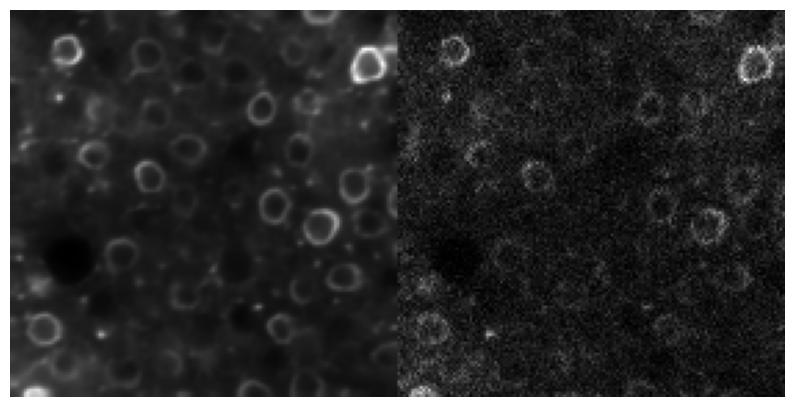

[2024-04-25 14:31:53,666]:  EVAL_count3:epoch 07 | valid_loss 1209836544.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:32:00,342]:  epoch 08 | train_loss 1154197490.991 | train_psnr inf | train_ssim 0.996 | lr 5.0e-04                                                       
  3%|▎         | 16/500 [00:00<00:05, 84.03it/s]

tensor(4961.8589, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


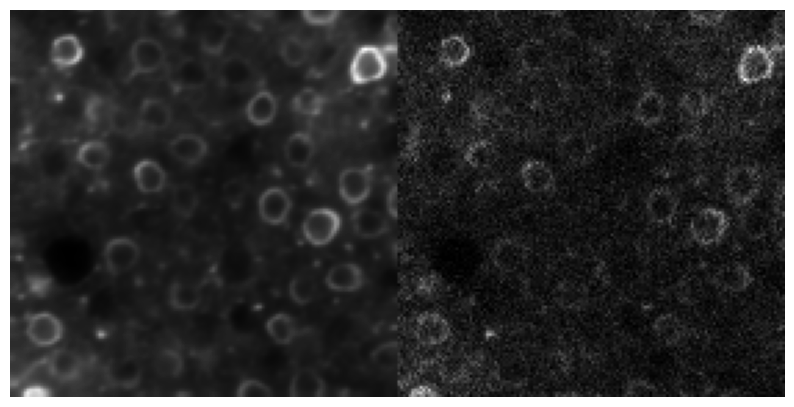

[2024-04-25 14:32:03,728]:  EVAL_count4:epoch 08 | valid_loss 1177172608.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04
[2024-04-25 14:32:10,419]:  epoch 09 | train_loss 1157214348.888 | train_psnr inf | train_ssim 0.995 | lr 5.0e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 89.80it/s]

tensor(5097.4502, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


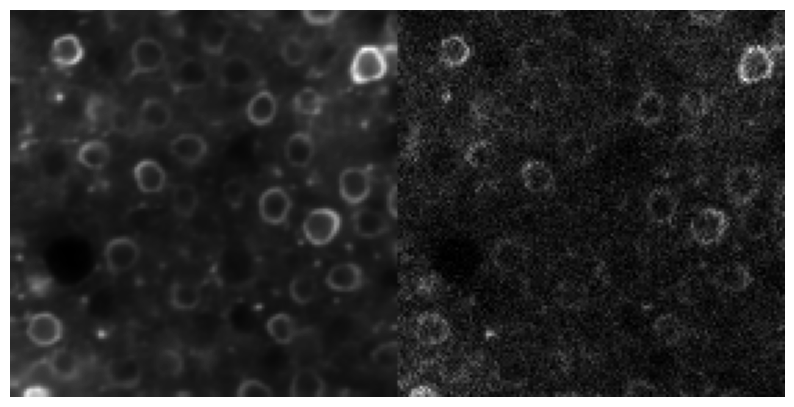

[2024-04-25 14:32:13,803]:  EVAL_count0:epoch 09 | valid_loss 899797376.000 | valid_psnr inf | valid_ssim 0.996 | lr 5.0e-04


learning rate reduced by factor of 2


[2024-04-25 14:32:20,526]:  epoch 10 | train_loss 1160967536.366 | train_psnr inf | train_ssim 0.996 | lr 2.5e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 85.07it/s]

tensor(4899.8970, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


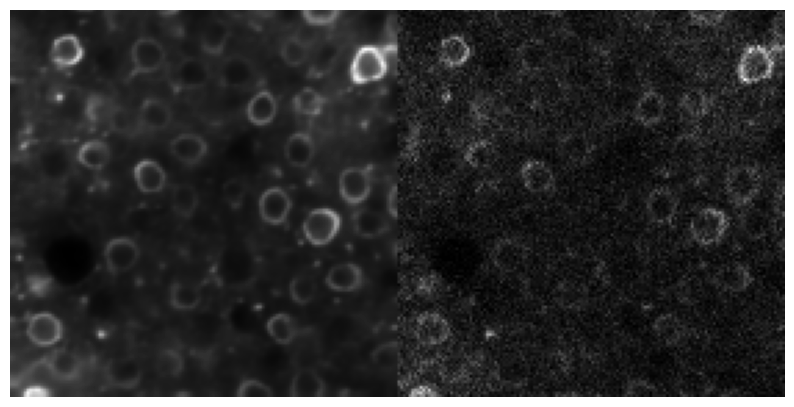

[2024-04-25 14:32:23,970]:  EVAL_count1:epoch 10 | valid_loss 900662016.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:32:30,532]:  epoch 11 | train_loss 1124376823.051 | train_psnr inf | train_ssim 0.995 | lr 2.5e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 86.13it/s]

tensor(4850.4648, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


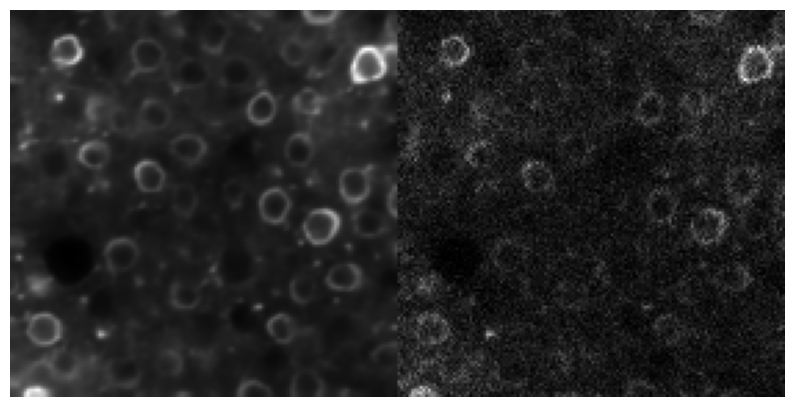

[2024-04-25 14:32:33,904]:  EVAL_count2:epoch 11 | valid_loss 1173565312.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:32:40,499]:  epoch 12 | train_loss 1175376013.306 | train_psnr inf | train_ssim 0.996 | lr 2.5e-04                                                      
  3%|▎         | 15/500 [00:00<00:06, 78.22it/s]

tensor(5071.2466, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


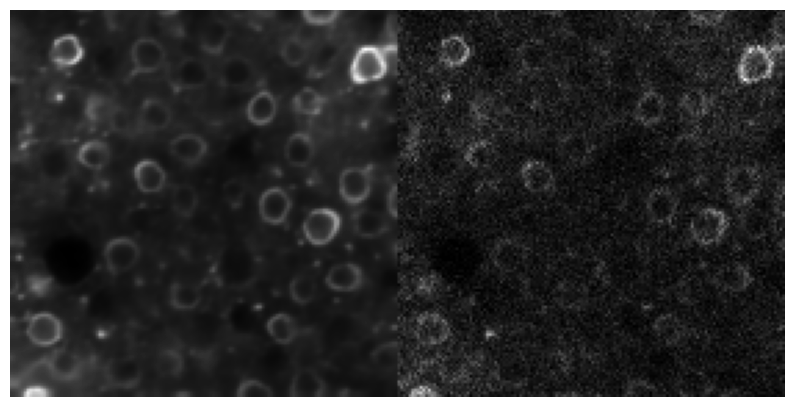

[2024-04-25 14:32:43,859]:  EVAL_count3:epoch 12 | valid_loss 1062772992.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:32:50,322]:  epoch 13 | train_loss 1151958202.619 | train_psnr inf | train_ssim 0.995 | lr 2.5e-04                                                      
  3%|▎         | 14/500 [00:00<00:06, 76.67it/s]

tensor(4618.8687, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


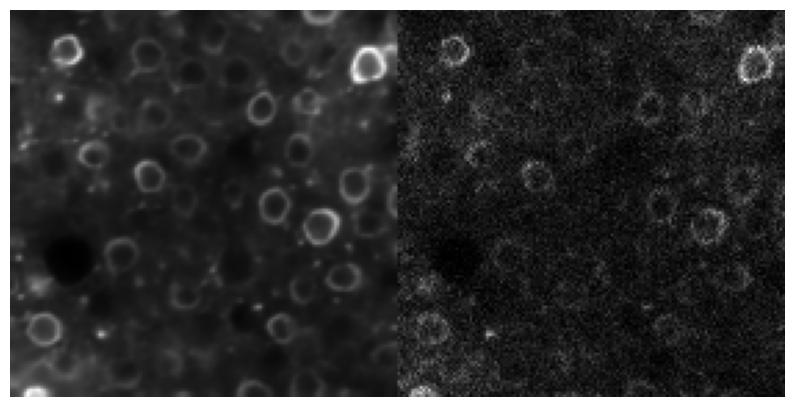

[2024-04-25 14:32:53,643]:  EVAL_count4:epoch 13 | valid_loss 1181243136.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:33:00,212]:  epoch 14 | train_loss 1149087271.652 | train_psnr inf | train_ssim 0.995 | lr 2.5e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 90.96it/s]

tensor(4900.5522, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


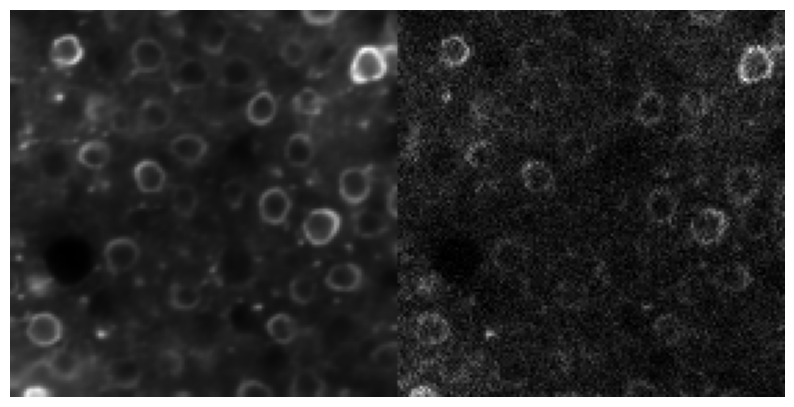

[2024-04-25 14:33:03,601]:  EVAL_count5:epoch 14 | valid_loss 1272484736.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:33:10,087]:  epoch 15 | train_loss 1148700359.364 | train_psnr inf | train_ssim 0.995 | lr 2.5e-04                                                      
  4%|▎         | 18/500 [00:00<00:05, 89.92it/s]

tensor(4805.4453, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


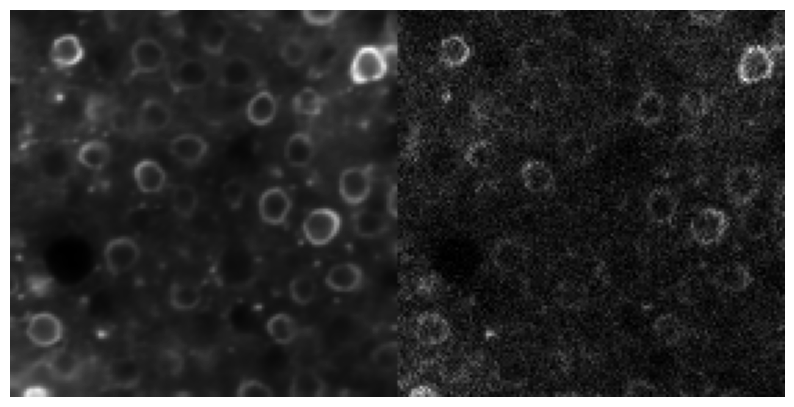

[2024-04-25 14:33:13,431]:  EVAL_count6:epoch 15 | valid_loss 914570880.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:33:19,927]:  epoch 16 | train_loss 1120572956.963 | train_psnr inf | train_ssim 0.995 | lr 2.5e-04                                                      
  3%|▎         | 14/500 [00:00<00:06, 74.81it/s]

tensor(4859.9419, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


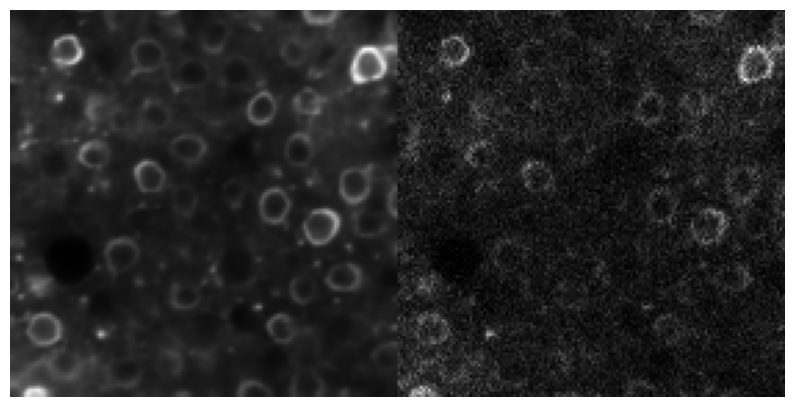

[2024-04-25 14:33:23,309]:  EVAL_count0:epoch 16 | valid_loss 882774144.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:33:29,808]:  epoch 17 | train_loss 1144107727.810 | train_psnr inf | train_ssim 0.996 | lr 2.5e-04                                                      
  3%|▎         | 14/500 [00:00<00:06, 78.17it/s]

tensor(4493.8818, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


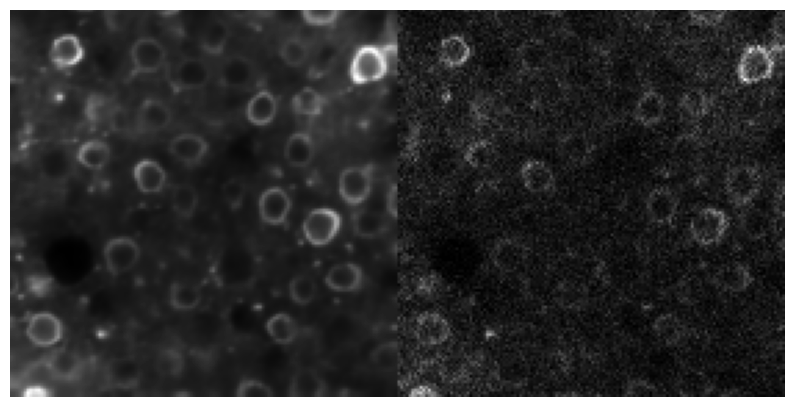

[2024-04-25 14:33:33,146]:  EVAL_count1:epoch 17 | valid_loss 1126154240.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:33:39,629]:  epoch 18 | train_loss 1154565460.772 | train_psnr inf | train_ssim 0.996 | lr 2.5e-04                                                      
  3%|▎         | 15/500 [00:00<00:05, 80.93it/s]

tensor(4809.4629, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


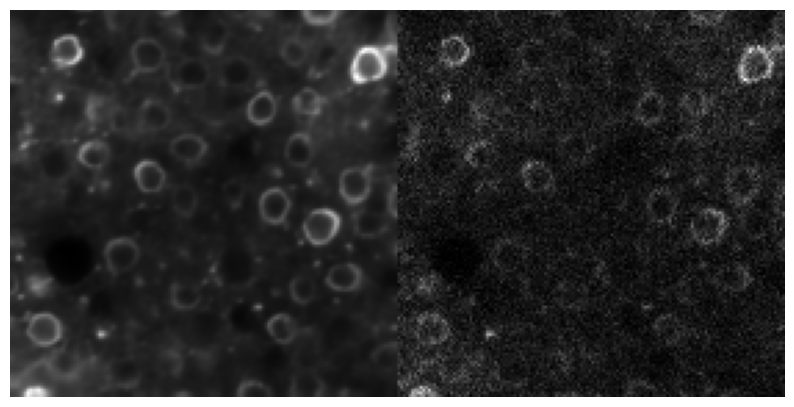

[2024-04-25 14:33:43,003]:  EVAL_count2:epoch 18 | valid_loss 1157257088.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04
[2024-04-25 14:33:49,541]:  epoch 19 | train_loss 1116265445.257 | train_psnr inf | train_ssim 0.995 | lr 2.5e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 86.82it/s]

tensor(4865.5894, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


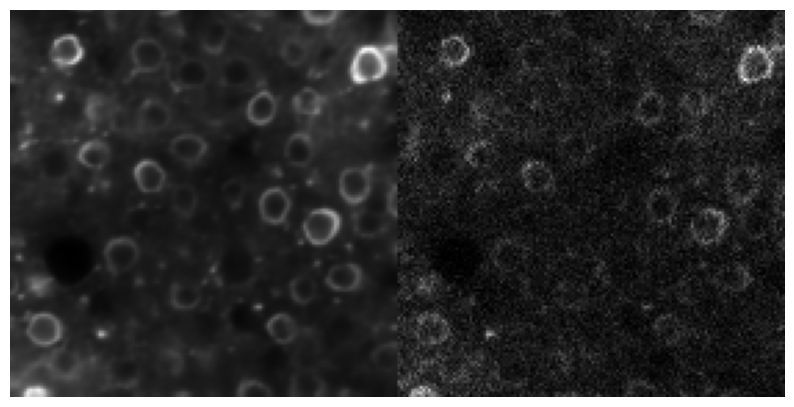

[2024-04-25 14:33:52,898]:  EVAL_count3:epoch 19 | valid_loss 897003328.000 | valid_psnr inf | valid_ssim 0.996 | lr 2.5e-04


learning rate reduced by factor of 2


[2024-04-25 14:33:59,355]:  epoch 20 | train_loss 1148773577.512 | train_psnr inf | train_ssim 0.996 | lr 1.3e-04                                                      
  4%|▎         | 18/500 [00:00<00:05, 90.85it/s]

tensor(4599.3550, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


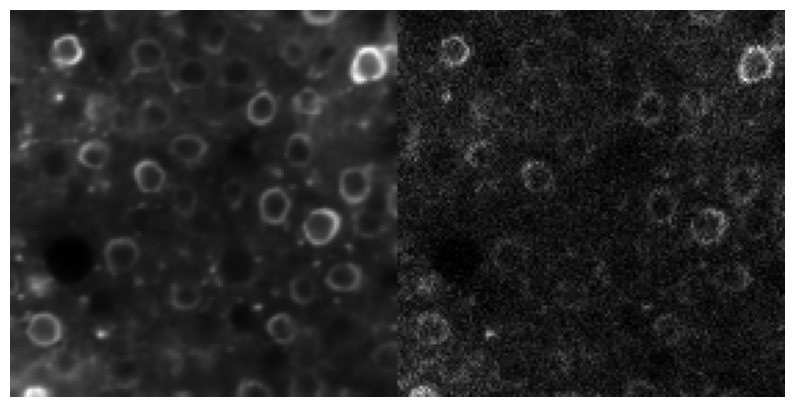

[2024-04-25 14:34:02,704]:  EVAL_count4:epoch 20 | valid_loss 1119406336.000 | valid_psnr inf | valid_ssim 0.996 | lr 1.3e-04
[2024-04-25 14:34:09,491]:  epoch 21 | train_loss 1118538701.480 | train_psnr inf | train_ssim 0.995 | lr 1.3e-04                                                      
  3%|▎         | 15/500 [00:00<00:05, 83.17it/s]

tensor(4660.3525, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


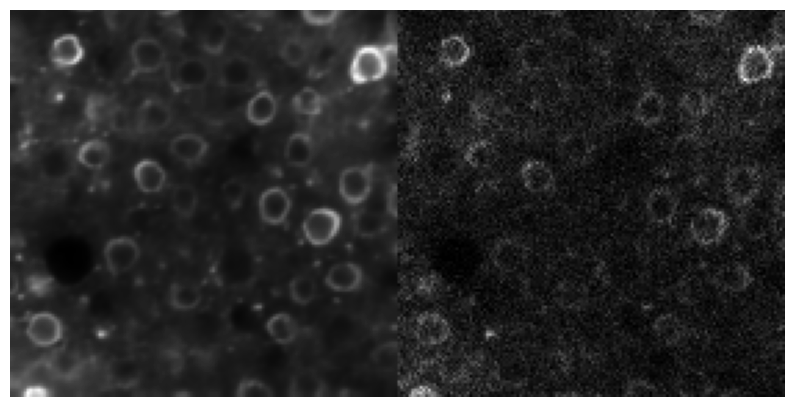

[2024-04-25 14:34:12,866]:  EVAL_count5:epoch 21 | valid_loss 1143366144.000 | valid_psnr inf | valid_ssim 0.996 | lr 1.3e-04
[2024-04-25 14:34:19,363]:  epoch 22 | train_loss 1119616371.943 | train_psnr inf | train_ssim 0.995 | lr 1.3e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 86.80it/s]

tensor(4680.0640, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


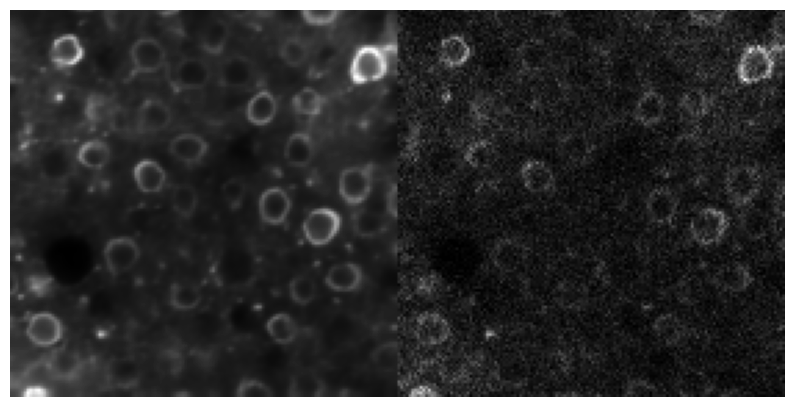

[2024-04-25 14:34:22,746]:  EVAL_count6:epoch 22 | valid_loss 969305280.000 | valid_psnr inf | valid_ssim 0.996 | lr 1.3e-04
[2024-04-25 14:34:29,250]:  epoch 23 | train_loss 1123730739.331 | train_psnr inf | train_ssim 0.995 | lr 1.3e-04                                                      
  4%|▎         | 18/500 [00:00<00:05, 86.15it/s]

tensor(4567.3931, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


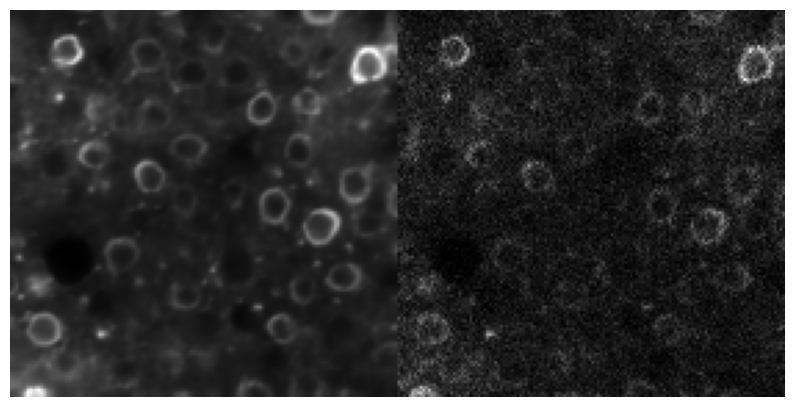

[2024-04-25 14:34:32,607]:  EVAL_count7:epoch 23 | valid_loss 1183784832.000 | valid_psnr inf | valid_ssim 0.996 | lr 1.3e-04
[2024-04-25 14:34:39,100]:  epoch 24 | train_loss 1105435243.689 | train_psnr inf | train_ssim 0.994 | lr 1.3e-04                                                      
  3%|▎         | 17/500 [00:00<00:05, 87.77it/s]

tensor(4517.0806, device='cuda:0') tensor(7161.1616, device='cuda:0') tensor(53.6850, device='cuda:0')


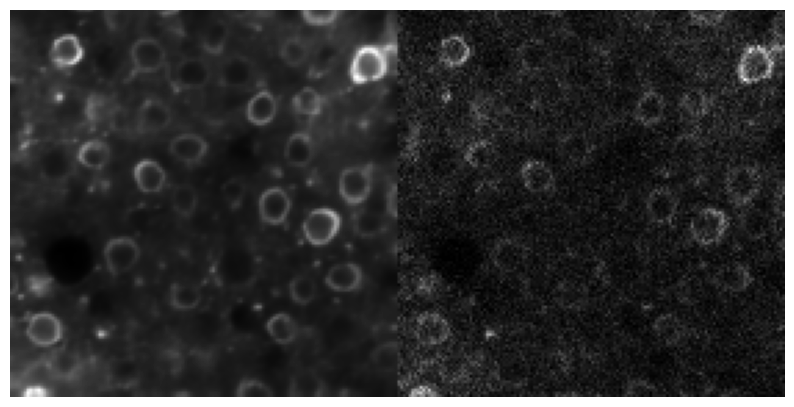

[2024-04-25 14:34:42,457]:  EVAL_count8:epoch 24 | valid_loss 900545216.000 | valid_psnr inf | valid_ssim 0.996 | lr 1.3e-04


In [2]:
sequence = 'standard'
repo="../../../../../../zfs/ailab/Denoising"
data_path = f"{repo}/Dataset/Simulated_2P"
batch_size = None
image_size = 128
stride = 128
n_frames = 7
mid = n_frames // 2
loss_fn ='mse'
valid_interval = 1
global_step = -1
start_epoch = 0
num_epochs=25
LEVEL = 1
MINV = 0
filters=64
total_frames = 500


clean_path = f"{data_path}/Clean/2P_standardClean.tif"
noise_path = f'{data_path}/2P_standardNoisy.tif'

# log_dir = f'{repo}/CVMI2024/Naomi/Ablation/{n_frames}_N_Frames/{sequence}_{total_frames}F'
log_dir = "./"
logger = get_logger(log_folder=log_dir, sequence=sequence)
logger.info(f'Checkpoint path: {log_dir}')

def load_data(clean_path, noise_path, batch_size, image_size, stride, n_frames):
    train_dataset = Naomi_data(clean_path, noise_path, patch_size=image_size, stride=stride, n_frames=n_frames, length=total_frames)
    valid_dataset = Naomi_data(clean_path, noise_path, patch_size=None, stride=stride, n_frames=n_frames, length=500)
    print(len(train_dataset), len(valid_dataset))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=8, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=2, shuffle=False)
    return train_loader, valid_loader

train_loader, valid_loader = load_data(clean_path=clean_path, noise_path=noise_path,
                                       batch_size=batch_size, image_size=image_size, stride=stride, n_frames=n_frames)

logger.info(f"Batch size:{batch_size}, filters:{filters}")

model =  Denoiser(in_channels=1, n_output=1, bias=False, n_frames=n_frames, level=1, minv=0.0).to(device)
cpf = model.c # channels per frame

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[1000], gamma=0.5)
logger.info(f"Built a model consisting of {sum(p.numel() for p in model.parameters()):,} parameters")

# Track moving average of loss values
train_meters = {name: RunningAverageMeter(0.98) for name in (["train_loss", "train_psnr", "train_ssim"])}
valid_meters = {name: AverageMeter() for name in (["valid_loss", "valid_psnr", "valid_ssim"])}


val_loss = np.inf
counter = 0 
patience = 5

for epoch in range(start_epoch, num_epochs):
    if epoch %10 == 0:
        optimizer.param_groups[0]["lr"] /= 2
        print('learning rate reduced by factor of 2')
    train_bar = ProgressBar(train_loader, epoch)
    for meter in train_meters.values():
        meter.reset()

    for batch_id, (inputs, noisy_inputs) in enumerate(train_bar):
        model.train()
        global_step += 1
        
        noisy_frame = noisy_inputs[(mid):(mid+1), :, :, :].to(device)
        inputs = inputs.to(device)
        noisy_inputs = noisy_inputs.to(device)

        outputs = model(noisy_inputs)

        loss = loss_function(outputs, noisy_frame, mode=loss_fn, device=device)

        model.zero_grad()
        loss.backward()
        optimizer.step()

        train_psnr = psnr_fn(inputs[(mid):(mid+1), :, :, :], outputs)
        train_ssim = ssim_fn(inputs[(mid):(mid+1), :, :, :], outputs)
        train_meters["train_loss"].update(loss.item())
        train_meters["train_psnr"].update(train_psnr.item())
        train_meters["train_ssim"].update(train_ssim.item())

        train_bar.log(dict(**train_meters, lr=optimizer.param_groups[0]["lr"]), verbose=True)


    scheduler.step()
    logger.info(train_bar.print(dict(**train_meters, lr=optimizer.param_groups[0]["lr"]), verbose=False))


####Validation#########
    if (epoch+1) % valid_interval == 0:
        model.eval()
        for meter in valid_meters.values():
            meter.reset()

        valid_bar = ProgressBar(valid_loader)
        running_valid_psnr = 0.0
        for sample_id, (sample, noisy_inputs) in enumerate(valid_bar):
            with torch.no_grad():
                val_noisy_frame = noisy_inputs[(mid):(mid+1), :, :, :].to(device)

                sample = sample.to(device)
                noisy_inputs = noisy_inputs.to(device)
                
                val_outputs = model(noisy_inputs)

                loss = loss_function(outputs, noisy_frame, mode=loss_fn, device=device)

                valid_psnr = psnr_fn(sample[(mid):(mid+1), :, :, :], val_outputs)
                valid_ssim = ssim_fn(sample[(mid):(mid+1), :, :, :], val_outputs)

                # valid_SNR = calculate_snr(sample[(mid):(mid+1), :, :, :], val_outputs)

                running_valid_psnr += valid_psnr
                valid_meters["valid_loss"].update(loss.item())
                valid_meters["valid_psnr"].update(valid_psnr.item())

                valid_meters["valid_ssim"].update(valid_ssim.item())


                noise_PSNR = psnr_fn(sample[(mid):(mid+1), :, :, :], val_noisy_frame)

                output_img = val_outputs[0].permute(1,2,0).cpu().squeeze().numpy()
                output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min())
                save_folder = f"{log_dir}/Epoch{str(epoch).zfill(2)}"
                # os.makedirs(save_folder, exist_ok=True)
                # plt.imsave(f"{save_folder}/{str(sample_id).zfill(4)}.png", output_img, cmap='gray')

                if sample_id == 30:
                    print(val_outputs.max(), val_noisy_frame.max(), sample.max())
                    plt.figure(figsize=(10,8))

                    valout = val_outputs[0].permute(1,2,0)
                    valout = (valout - valout.min()) / (valout.max() - valout.min())

                    valclean = sample[(mid):(mid+1), :, :, :][0]
                    valclean = (valclean - valclean.min()) / (valclean.max() - valclean.min())

                    valnoise = val_noisy_frame[0].permute(1,2,0)
                    valnoise = (valnoise - valnoise.min()) / (valnoise.max() - valnoise.min())

                    out_img = torch.cat([valout,valnoise], dim=1).cpu()

                    plt.imshow(out_img, cmap='gray')
                    # plt.title(f"PSNR:{valid_psnr}   SSIM:{valid_ssim}")
                    # plt.title(f"PSNR_Output:{valid_psnr.item()}    PSNR_Noise:{noise_PSNR}")
                    plt.axis('off')
                    plt.show()

        running_valid_psnr /= (sample_id+1)

        
        if valid_meters["valid_loss"].avg < val_loss:
            # print('less')
            val_loss = valid_meters["valid_loss"].avg 
            counter =0 
        else:
            counter += 1

        logger.info(f"EVAL_count{counter}:"+train_bar.print(dict(**valid_meters, lr=optimizer.param_groups[0]["lr"])))

        with open(f'{log_dir}/0snr_results.txt', 'a') as f:
            f.write(f"Epoch{epoch}: {valid_meters['valid_ssim'].avg}\n")

        save_checkpoint(log_dir, epoch+1, model, optimizer, score=valid_meters["valid_loss"].avg, mode="min")


    if counter >= patience:
        # torch.save(model, log_dir+'/checkpoint_last.pt')
        break
close_logger_handlers(logger)